In [1]:
import pandas as pd
import pysubgroup as ps

In [2]:
from pathlib import Path
import numpy as np
folder= Path.home()/Path('Downloads')
def show_info(df):
    print(df.columns)
    print(len(df))

In [3]:
df_melb = pd.read_csv(folder/'melb_data.csv')
df_melb = df_melb[df_melb['BuildingArea'] < 1500]
df_melb=df_melb.drop(['Address', "Lattitude", "Longtitude"],axis=1)
#df_housing['price']/=np.max(df_housing['price'])

In [4]:
print(df_melb.columns)
print(len(df_melb))

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')
7125


In [5]:
df_bej = pd.read_csv(folder/'bejing.csv',engine="python")
df_bej=df_bej.drop(['url','id','Lng','Lat','Cid','tradeTime','floor'],axis=1)
#df_melb = df_melb[df_melb['BuildingArea'] < 1500]

In [6]:
show_info(df_bej)

Index(['DOM', 'followers', 'totalPrice', 'price', 'square', 'livingRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'buildingType',
       'constructionTime', 'renovationCondition', 'buildingStructure',
       'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage'],
      dtype='object')
318851


In [7]:
df_nyc = pd.read_csv(folder/'nyc_data.csv')
df_nyc=df_nyc[df_nyc['SALE PRICE'].str.isnumeric()]
df_nyc['SALE PRICE']=pd.to_numeric(df_nyc['SALE PRICE'])
df_nyc=df_nyc[df_nyc['SALE PRICE']<0.5*10**7]
df_nyc=df_nyc[df_nyc['TOTAL UNITS']<1500]
show_info(df_nyc)

FileNotFoundError: [Errno 2] File C:\Users\Stamm\Downloads\nyc_data.csv does not exist: 'C:\\Users\\Stamm\\Downloads\\nyc_data.csv'

In [ ]:
#ax=df_melb.plot.scatter('BuildingArea', 'Price')
#df_nyc.plot.scatter('TOTAL UNITS', 'SALE PRICE', ax =ax, color='r')

In [ ]:
show_info(df_bej)
def room2Numeric(df, column):
    #print(df[column].dtype)
    if df[column].dtype != 'object':
        return df
    df = df[df[column].str.isnumeric()]
    df[column] = pd.to_numeric(df[column])
    return df
df_bej=room2Numeric(df_bej, 'livingRoom')
df_bej=room2Numeric(df_bej, 'drawingRoom')
df_bej=room2Numeric(df_bej, 'bathRoom')
df_bej=room2Numeric(df_bej, 'constructionTime')

In [10]:
df_bej.DOM

0         1464.0
1          903.0
2         1271.0
3          965.0
4          927.0
           ...  
318845       1.0
318846       1.0
318847       NaN
318848       1.0
318849       NaN
Name: DOM, Length: 299536, dtype: float64

In [11]:
show_plots=False

In [12]:

#ax=df_nyc["SALE PRICE"].plot.hist(bins=100)
df_melb=df_melb[df_melb["Price"]<5000000]
if show_plots:
    df_melb["Price"].plot.hist(bins=100,color='r')

In [13]:
df_bej=df_bej[df_bej["price"]>5000]
if show_plots:
    df_bej["price"].plot.hist(bins=100,color='b')

In [14]:
import matplotlib.pyplot as plt
if show_plots:
    ax=plt.hist(df_bej["price"]/np.std(df_bej["price"]),bins=100,color='b',density=True,alpha=0.5)
    h=plt.hist(df_melb["Price"]/np.std(df_melb["Price"]),bins=100,color='r',density=True,alpha=0.5)


In [15]:
if show_plots:
    ax=plt.scatter(df_bej['square'],df_bej["price"]/np.std(df_bej["price"]),alpha=0.7)
    ax=plt.scatter(df_melb['BuildingArea'],df_melb["Price"]/np.std(df_melb["Price"]),alpha=0.5)

In [16]:
df_bej['price']=df_bej["price"]/np.std(df_bej["price"])
df_melb['Price']=df_melb["Price"]/np.std(df_melb["Price"])

In [17]:
df_bej['elevator']=df_bej['elevator'].astype('bool')
df_bej['subway']=df_bej['subway'].astype('bool')
df_bej['fiveYearsProperty']=df_bej['fiveYearsProperty'].astype('bool')

In [18]:
show_info(df_bej)
show_info(df_melb)

Index(['DOM', 'followers', 'totalPrice', 'price', 'square', 'livingRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'buildingType',
       'constructionTime', 'renovationCondition', 'buildingStructure',
       'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage'],
      dtype='object')
298616
Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')
7110


In [19]:
def create_bej_selectors(df,ignore=['price','square']):
    ignore+=['communityAverage']
    sels=ps.create_nominal_selectors(df,ignore=ignore)+ps.create_numeric_selectors(df,ignore=ignore)
    return sels

def create_melb_selectors(df,ignore=['BuildingArea','Price']):
    ignore+=['Date','SellerG','Suburb']
    sels=ps.create_nominal_selectors(df,ignore=ignore)+ps.create_numeric_selectors(df,ignore=ignore)
    return sels

def run_single_task(df_bej, df_melb, Qf_L, Qf_R, sim_fun, total_fun, parameters):
    sels_L=create_bej_selectors(df_bej)
    sels_R=create_melb_selectors(df_melb)

    task_L = ps.SubgroupDiscoveryTask(df_bej, None, sels_L, Qf_L, result_set_size = parameters.result_size, depth=3)
    task_L.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#parameters.result_size)
    task_R = ps.SubgroupDiscoveryTask(df_melb, None, sels_R, Qf_R, result_set_size = parameters.result_size, depth=parameters.depth)
    task_R.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#(parameters.result_size)
    similarity_function = sim_fun
    run=beam_search_through_candidates(task_L, task_R, parameters.total_result_size, None, similarity_function, total_fun, show_progress=True)

    tpl_L=next(run)
    tpl_R=next(run)
    result=next(run)
    return result

In [88]:
from model_mining.evaluation_framework import *
result=[]
alpha=0.5
beta=0.0
gamma=0.1
ex_qf1 = SizeWrapper(EMM_LikelihoodGain(PolyRegression_ModelClass('square','price')), gamma)
ex_qf2 = SizeWrapper(EMM_LikelihoodGain(PolyRegression_ModelClass('BuildingArea','Price')), gamma)
sim_qf = DoubleCooksSimilarity(PolyRegression_ModelClass('square','price'), PolyRegression_ModelClass('BuildingArea','Price'))
#sim_qf = LikelihoodSimilarity(PolyRegression_ModelClass('square','price'), PolyRegression_ModelClass('BuildingArea','Price'))
parameters=mine_pair_parameters(500,100,2,'mine_pair',[])

result=run_single_task(df_bej, df_melb, ex_qf1, ex_qf2, sim_qf, functools.partial(final_qf,alpha,beta), parameters)

11%|█         | 5822/54809 [00:19<02:06, 388.07it/s]/home/felixstamm/Code/pysubgroup/pysubgroup/model_mining/QualityFunctions.py:214: RankWarning: Polyfit may be poorly conditioned
  params = self.model.fit(cover_arr, data)
 30%|███       | 16552/54809 [00:46<01:41, 377.09it/s]/home/felixstamm/Code/pysubgroup/pysubgroup/model_mining/QualityFunctions.py:214: RankWarning: Polyfit may be poorly conditioned
  params = self.model.fit(cover_arr, data)
 37%|███▋      | 20235/54809 [00:52<01:03, 546.06it/s]/home/felixstamm/Code/pysubgroup/pysubgroup/model_mining/QualityFunctions.py:214: RankWarning: Polyfit may be poorly conditioned
  params = self.model.fit(cover_arr, data)
 44%|████▍     | 24203/54809 [00:59<00:53, 572.57it/s]/home/felixstamm/Code/pysubgroup/pysubgroup/model_mining/QualityFunctions.py:214: RankWarning: Polyfit may be poorly conditioned
  params = self.model.fit(cover_arr, data)
 54%|█████▍    | 29554/54809 [01:09<00:57, 437.10it/s]/home/felixstamm/Code/pysubgroup/pysubgroup/

In [89]:
print(result)

ood_stats(beta=array([-0.0055421 ,  1.19867781]), size=2, basis=array([ 2.00000000e+00,  2.07000000e+02,  1.25014020e+00, -6.92762938e-02,
        2.14370000e+04])), 0.02124322277443241, 0.11712972309856767, 0.04961378008324073)), (0.0002968445923833488, (<<None; D: (bathRoom: [2:3[ and buildingStructure: [2:4[ and totalPrice<189.4)>>, <<None; D: (Bedroom2: [2.0:3.0[ and CouncilArea=='Frankston')>>, likelihood_stats(beta=array([-0.00546756,  1.29394015]), size=1017, basis=array([ 1.01700000e+03,  1.13373070e+05,  6.96063219e+02, -3.02055612e+03,
        1.31910475e+07])), likelihood_stats(beta=array([-0.0055421 ,  1.19867781]), size=2, basis=array([ 2.00000000e+00,  2.07000000e+02,  1.25014020e+00, -6.92762938e-02,
        2.14370000e+04])), 0.01769900876481013, 0.11593074526361244, 0.04961378008324073)), (0.0002582420116882908, (<<None; D: (drawingRoom: [2:3[ and followers: [0:3[ and totalPrice<189.4)>>, <<None; D: (CouncilArea=='Frankston' and Rooms: [2:3[)>>, likelihood_stats(beta=a

In [90]:
print(result[0][1])

(<<None; D: (district>=9 and kitchen==1 and totalPrice<189.4)>>, <<None; D: (CouncilArea=='Frankston' and Type=='u')>>, likelihood_stats(beta=array([-0.01348156,  1.98239708]), size=16275, basis=array([ 1.62750000e+04,  1.07393845e+06,  1.77851512e+04, -1.06792507e+05,
        7.87873566e+07])), likelihood_stats(beta=array([ 0.00791729, -0.09975786]), size=2, basis=array([2.00000000e+00, 2.29000000e+02, 1.61354385e+00, 2.47415335e+00,
       2.65330000e+04])), 4.6821514800238806e-05, 0.11084658355400785, 0.03846275450907655)


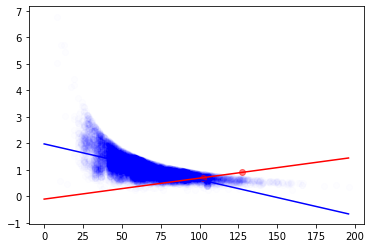

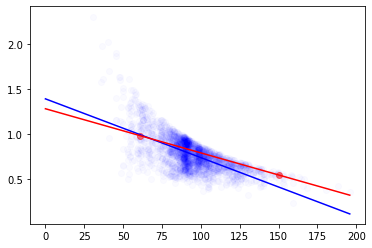

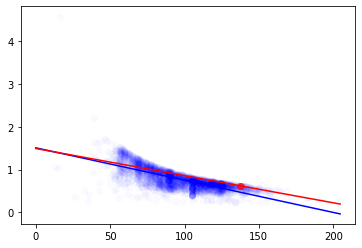

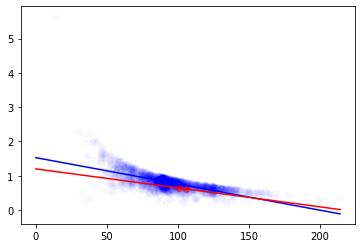

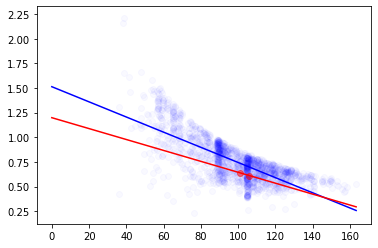

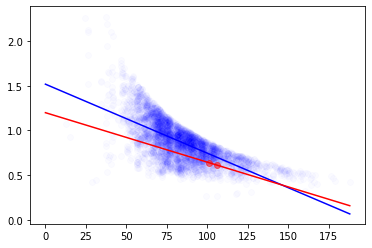

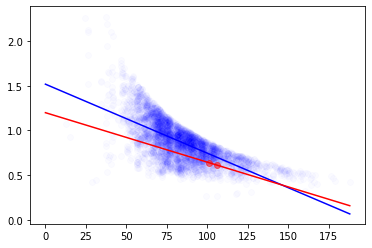

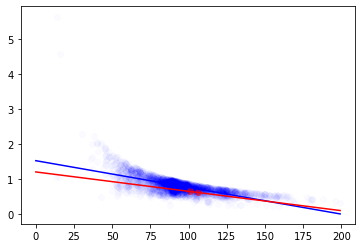

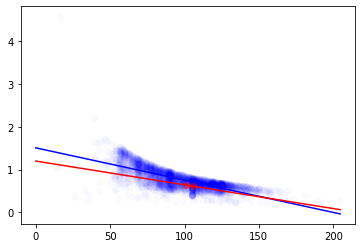

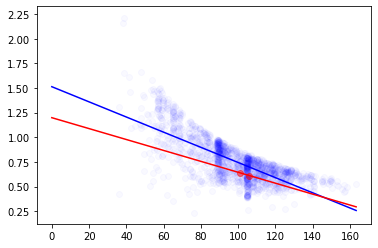

In [91]:
def plot_result(tpl,df1,df2):
    sgd1,sgd2,stats_1,stats_2,_,_,_=tpl
    df1_cov=df1[sgd1.covers(df1)]
    df2_cov=df2[sgd2.covers(df2)]
    max_square=max(df2_cov['BuildingArea'].max(),df1_cov['square'].max())
    x=np.linspace(0,max_square)

    
    plt.scatter(df1_cov['square'],df1_cov['price'],alpha=1/np.sqrt(len(df1_cov)),color='b')
    beta1=np.polyfit(df1_cov['square'],df1_cov['price'],1)
    plt.plot(x,np.polyval(beta1,x),color='b')

    plt.scatter(df2_cov['BuildingArea'],df2_cov['Price'],color='r',alpha=0.5)
    beta2=np.polyfit(df2_cov['BuildingArea'],df2_cov['Price'],1)
    plt.plot(x,np.polyval(beta2,x),color='r')
for i in range(10):
    plt.figure()
    plot_result(result[0+i][1],df_bej, df_melb)

In [92]:
for i,tpl in enumerate(result):
    print(i,tpl[1][0].subgroup_description,"\t",tpl[1][1].subgroup_description)

0 district>=9 AND kitchen==1 AND totalPrice<189.40 	 CouncilArea=='Frankston' AND Type=='u'
1 district>=9 AND drawingRoom: [2:3[ AND totalPrice<189.40 	 Car<1.0 AND Regionname=='Northern Victoria'
2 livingRoom: [3:4[ AND renovationCondition==1 AND totalPrice<189.40 	 CouncilArea=='Wyndham' AND Type=='u'
3 drawingRoom: [2:3[ AND fiveYearsProperty==False AND totalPrice<189.40 	 Bedroom2: [2.0:3.0[ AND CouncilArea=='Frankston'
4 district>=9 AND livingRoom: [3:4[ AND totalPrice<189.40 	 Bedroom2: [2.0:3.0[ AND CouncilArea=='Frankston'
5 constructionTime: [1999:2003[ AND ladderRatio: [0.50:0.54[ AND totalPrice<189.40 	 Bedroom2: [2.0:3.0[ AND CouncilArea=='Frankston'
6 constructionTime: [1999:2003[ AND ladderRatio: [0.50:0.54[ AND totalPrice<189.40 	 CouncilArea=='Frankston' AND Rooms: [2:3[
7 drawingRoom: [2:3[ AND subway==False AND totalPrice<189.40 	 Bedroom2: [2.0:3.0[ AND CouncilArea=='Frankston'
8 livingRoom: [3:4[ AND renovationCondition==1 AND totalPrice<189.40 	 CouncilArea=='Frank

In [96]:
all([])

True